In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('df_empilhado_final.csv')
df = df.drop(columns=["Unnamed: 0"])

colunas_numericas = df.columns.difference(['Nome', 'Data'])  # Exclui 'Nome' e 'Data'

# Passo 2: Remova vírgulas e converta colunas numéricas para float
for col in colunas_numericas:
    df[col] = df[col].astype(str).str.replace(',', '').astype(float)
df

,Nome,Data,EBITDA,LG,DE,GMV,ROA,ROE,FCLA,FCLF
0,3tentos,2021-07-01,119436.0,1.6,43.7,4694121.0,2.2,4.7,186785.0,-1108032.0
1,3tentos,2021-10-01,83550.0,1.7,35.8,4807768.0,3.8,7.5,-119487.0,-94868.0
2,3tentos,2022-01-01,54560.0,1.5,55.7,4887747.0,1.1,2.5,-320523.0,-409704.0
3,3tentos,2022-07-01,108988.0,1.4,44.5,5458398.0,2.9,6.5,596343.0,28224.0
4,3tentos,2022-10-01,249174.0,1.4,38.9,4632208.0,3.7,7.9,-249977.0,69746.0
...,...,...,...,...,...,...,...,...,...,...
9056,Zamp S.A.,2023-07-01,78485.0,0.4,86.6,1635318.0,-1.0,-2.9,5425.0,93351.0
9057,Zamp S.A.,2023-10-01,157194.0,0.4,80.1,1520606.0,1.4,4.3,93978.0,441774.0
9058,Zamp S.A.,2024-01-01,38715.0,0.5,136.7,921349.0,-2.0,-6.9,-59692.0,-621912.0
9059,Zamp S.A.,2024-04-01,101653.0,0.5,125.5,1016474.0,-0.6,-2.2,10855.0,172447.0


In [2]:
from sklearn.preprocessing import MinMaxScaler 

features = ['FCLA', 'FCLF', 'EBITDA', 'LG', 'DE', 'GMV', 'ROA', 'ROE']

scaler = MinMaxScaler()
df[features] = scaler.fit_transform(df[features])
df

,Nome,Data,EBITDA,LG,DE,GMV,ROA,ROE,FCLA,FCLF
0,3tentos,2021-07-01,0.218239,0.023634,0.203120,0.008221,0.603896,0.603701,0.361552,0.369358
1,3tentos,2021-10-01,0.217991,0.025111,0.203082,0.008420,0.612554,0.603771,0.358797,0.375960
2,3tentos,2022-01-01,0.217791,0.022157,0.203178,0.008560,0.597944,0.603646,0.356989,0.373908
3,3tentos,2022-07-01,0.218167,0.020679,0.203124,0.009560,0.607684,0.603746,0.365235,0.376762
4,3tentos,2022-10-01,0.219134,0.020679,0.203097,0.008112,0.612013,0.603782,0.357624,0.377032
...,...,...,...,...,...,...,...,...,...,...
9056,Zamp S.A.,2023-07-01,0.217956,0.005908,0.203327,0.002859,0.586580,0.603510,0.359921,0.377186
9057,Zamp S.A.,2023-10-01,0.218499,0.005908,0.203296,0.002658,0.599567,0.603691,0.360717,0.379456
9058,Zamp S.A.,2024-01-01,0.217682,0.007386,0.203568,0.001608,0.581169,0.603409,0.359335,0.372525
9059,Zamp S.A.,2024-04-01,0.218116,0.007386,0.203514,0.001775,0.588745,0.603527,0.359970,0.377701


In [3]:
df["g_FCLA_scaled"] = df.groupby("Nome")["FCLA"].pct_change()

df['g_FCLA_scaled'] = df['g_FCLA_scaled'].fillna(method='bfill')  

df_ = df[np.isfinite(df["g_FCLA_scaled"])]

if df['g_FCLA_scaled'].isnull().all():
    print("A coluna 'g' contém apenas valores ausentes.")

if df is None or df.empty:
    print("df_long não contém dados.")

df = df.dropna(subset=["g_FCLA_scaled"])
if len(df) == 0:
    print("Não há dados válidos para 'g' após o dropna.")
df

df['g_FCLA_scaled'] = df['g_FCLA_scaled'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['g_FCLA_scaled'])

var = ['g_FCLA_scaled']

df = df.sort_values(['Nome', 'Data'])
df['lag_g_FCLA'] = df.groupby('Nome')[var].shift(1)
df['ma_g_FCLA'] = df.groupby('Nome')[var].transform(lambda x: x.shift(1).rolling(3).mean())

df['lag_g_FCLA'] = df['lag_g_FCLA'].fillna(method='bfill')  # backward fill

df['ma_g_FCLA'] = df['ma_g_FCLA'].fillna(method='bfill')  # backward fill
df

,Nome,Data,EBITDA,LG,DE,GMV,ROA,ROE,FCLA,FCLF,g_FCLA_scaled,lag_g_FCLA,ma_g_FCLA
0,3tentos,2021-07-01,0.218239,0.023634,0.203120,0.008221,0.603896,0.603701,0.361552,0.369358,-0.007619,-0.007619,-0.006759
1,3tentos,2021-10-01,0.217991,0.025111,0.203082,0.008420,0.612554,0.603771,0.358797,0.375960,-0.007619,-0.007619,-0.006759
2,3tentos,2022-01-01,0.217791,0.022157,0.203178,0.008560,0.597944,0.603646,0.356989,0.373908,-0.005039,-0.007619,-0.006759
3,3tentos,2022-07-01,0.218167,0.020679,0.203124,0.009560,0.607684,0.603746,0.365235,0.376762,0.023100,-0.005039,-0.006759
4,3tentos,2022-10-01,0.219134,0.020679,0.203097,0.008112,0.612013,0.603782,0.357624,0.377032,-0.020841,0.023100,0.003480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9056,Zamp S.A.,2023-07-01,0.217956,0.005908,0.203327,0.002859,0.586580,0.603510,0.359921,0.377186,0.001193,0.000852,-0.000652
9057,Zamp S.A.,2023-10-01,0.218499,0.005908,0.203296,0.002658,0.599567,0.603691,0.360717,0.379456,0.002213,0.001193,-0.000586
9058,Zamp S.A.,2024-01-01,0.217682,0.007386,0.203568,0.001608,0.581169,0.603409,0.359335,0.372525,-0.003832,0.002213,0.001419
9059,Zamp S.A.,2024-04-01,0.218116,0.007386,0.203514,0.001775,0.588745,0.603527,0.359970,0.377701,0.001766,-0.003832,-0.000142


In [4]:
df["g_FCLF_scaled"] = df.groupby("Nome")["FCLF"].pct_change()

df['g_FCLF_scaled'] = df['g_FCLF_scaled'].fillna(method='bfill')  # forward fill

df_ = df[np.isfinite(df["g_FCLF_scaled"])]

if df['g_FCLF_scaled'].isnull().all():
    print("A coluna 'g' contém apenas valores ausentes.")

if df is None or df.empty:
    print("df_long não contém dados.")

df = df.dropna(subset=["g_FCLF_scaled"])
if len(df) == 0:
    print("Não há dados válidos para 'g' após o dropna.")
df

df['g_FCLF_scaled'] = df['g_FCLF_scaled'].replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['g_FCLF_scaled'])

var = ['g_FCLF_scaled']

df = df.sort_values(['Nome', 'Data'])
df['lag_g_fclf'] = df.groupby('Nome')[var].shift(1)
df['ma_g_fclf'] = df.groupby('Nome')[var].transform(lambda x: x.shift(1).rolling(3).mean())

df['lag_g_fclf'] = df['lag_g_fclf'].fillna(method='bfill')  
df['ma_g_fclf'] = df['ma_g_fclf'].fillna(method='bfill')  
df

,Nome,Data,EBITDA,LG,DE,GMV,ROA,ROE,FCLA,FCLF,g_FCLA_scaled,lag_g_FCLA,ma_g_FCLA,g_FCLF_scaled,lag_g_fclf,ma_g_fclf
0,3tentos,2021-07-01,0.218239,0.023634,0.203120,0.008221,0.603896,0.603701,0.361552,0.369358,-0.007619,-0.007619,-0.006759,0.017874,0.017874,0.010097
1,3tentos,2021-10-01,0.217991,0.025111,0.203082,0.008420,0.612554,0.603771,0.358797,0.375960,-0.007619,-0.007619,-0.006759,0.017874,0.017874,0.010097
2,3tentos,2022-01-01,0.217791,0.022157,0.203178,0.008560,0.597944,0.603646,0.356989,0.373908,-0.005039,-0.007619,-0.006759,-0.005457,0.017874,0.010097
3,3tentos,2022-07-01,0.218167,0.020679,0.203124,0.009560,0.607684,0.603746,0.365235,0.376762,0.023100,-0.005039,-0.006759,0.007632,-0.005457,0.010097
4,3tentos,2022-10-01,0.219134,0.020679,0.203097,0.008112,0.612013,0.603782,0.357624,0.377032,-0.020841,0.023100,0.003480,0.000718,0.007632,0.006683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9056,Zamp S.A.,2023-07-01,0.217956,0.005908,0.203327,0.002859,0.586580,0.603510,0.359921,0.377186,0.001193,0.000852,-0.000652,0.002731,-0.000397,-0.000692
9057,Zamp S.A.,2023-10-01,0.218499,0.005908,0.203296,0.002658,0.599567,0.603691,0.360717,0.379456,0.002213,0.001193,-0.000586,0.006019,0.002731,0.000245
9058,Zamp S.A.,2024-01-01,0.217682,0.007386,0.203568,0.001608,0.581169,0.603409,0.359335,0.372525,-0.003832,0.002213,0.001419,-0.018266,0.006019,0.002784
9059,Zamp S.A.,2024-04-01,0.218116,0.007386,0.203514,0.001775,0.588745,0.603527,0.359970,0.377701,0.001766,-0.003832,-0.000142,0.013895,-0.018266,-0.003172


In [5]:
import time
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

target_var = 'g_FCLF_scaled'
k = 4

def expanding_window_forecast_arima(df, target_col=target_var, empresa_col='Nome', date_col='Data',
                                     min_train_size=k, horizon=1, arima_order=(1,1,1)):
    results = []

    for empresa_id, grupo in df.groupby(empresa_col):
        grupo = grupo.sort_values(date_col).reset_index(drop=True)

        for end_train in range(min_train_size, len(grupo) - horizon + 1):
            train = grupo.iloc[:end_train]
            test = grupo.iloc[end_train:end_train + horizon]

            y_train = train[target_col]
            y_test = test[target_col]

            try:
                model = ARIMA(y_train, order=arima_order)
                model_fit = model.fit()

                forecast = model_fit.forecast(steps=horizon)
                y_pred = forecast.values[0]
                erro = abs(y_pred - y_test.values[0])

                train_pred = model_fit.fittedvalues
                train_rmse = mean_squared_error(y_train[1:], train_pred[1:], squared=False)
                test_rmse = mean_squared_error([y_test.values[0]], [y_pred], squared=False)

                overfitting = train_rmse < test_rmse * 0.5
                underfitting = train_rmse > test_rmse * 0.5  

                results.append({
                    'Empresa': empresa_id,
                    'Data': test[date_col].values[0],
                    'Real': y_test.values[0],
                    'Previsto': y_pred,
                    'Erro Absoluto': erro,
                    'Train RMSE': train_rmse,
                    'Test RMSE': test_rmse,
                    'Overfitting?': overfitting,
                    'Underfitting?': underfitting
                })

            except Exception as e:
                print(f"Erro ao ajustar ARIMA para {empresa_id} na data {test[date_col].values[0]}: {e}")
                continue

    return pd.DataFrame(results)

# Exemplo de uso:
media = df[target_var].mean()
dp = df[target_var].std()

start = time.time()
resultado = expanding_window_forecast_arima(df)
end = time.time()

print(f'Tempo de computação: {end - start:.2f} segundos')

rmse = mean_squared_error(resultado['Real'], resultado['Previsto'], squared=False)
mae = mean_absolute_error(resultado['Real'], resultado['Previsto'])
r2 = r2_score(resultado['Real'], resultado['Previsto'])

train_rmse_media = resultado['Train RMSE'].mean()
test_rmse_media = resultado['Test RMSE'].mean()
print(f'R2 da regressão: {r2}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'RMSE como % da média: {(rmse/media)*100:.2f}%')
print(f'RMSE como % do DP: {(rmse/dp)*100:.2f}%')
print(f'RMSE Treino Média: {train_rmse_media}')
print(f'RMSE Teste Média: {test_rmse_media}')
print(f'Fit do modelo: {train_rmse_media/test_rmse_media}')
resultado

Tempo de computação: 498.71 segundos
R2 da regressão: -0.46589712782167614
RMSE: 0.06827504261580082
MAE: 0.016215702115263114
RMSE como % da média: 3891.38%
RMSE como % do DP: 99.73%
RMSE Treino Média: 0.018535413829813868
RMSE Teste Média: 0.016215702115263114
Fit do modelo: 1.1430534242712385


,Empresa,Data,Real,Previsto,Erro Absoluto,Train RMSE,Test RMSE,Overfitting?,Underfitting?
0,3tentos,2022-10-01,0.000718,0.004111,0.003393,0.013563,0.003393,False,True
1,3tentos,2023-01-01,-0.002094,0.004095,0.006189,0.011760,0.006189,False,True
2,3tentos,2023-04-01,-0.001256,-0.000310,0.000946,0.010818,0.000946,False,True
3,3tentos,2023-07-01,0.003401,-0.001335,0.004735,0.009876,0.004735,False,True
4,3tentos,2023-10-01,-0.004247,0.001116,0.005363,0.009326,0.005363,False,True
...,...,...,...,...,...,...,...,...,...
7921,Zamp S.A.,2023-07-01,0.002731,0.000291,0.002440,0.007487,0.002440,False,True
7922,Zamp S.A.,2023-10-01,0.006019,0.000383,0.005636,0.007349,0.005636,False,True
7923,Zamp S.A.,2024-01-01,-0.018266,0.001411,0.019677,0.007259,0.019677,True,False
7924,Zamp S.A.,2024-04-01,0.013895,0.000647,0.013248,0.008143,0.013248,False,True


In [6]:
resultado.to_csv('ARIMA_resultados.csv')

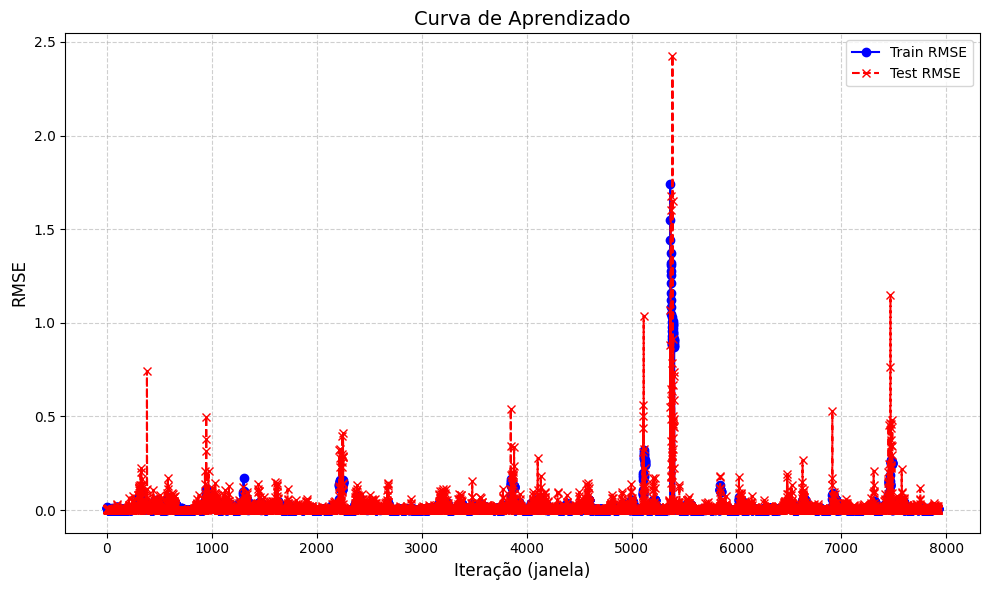

In [7]:
x_vals = range(len(resultado))  # ou resultado['Data'] se quiser por data

plt.figure(figsize=(10, 6))
plt.plot(x_vals, resultado['Train RMSE'], label='Train RMSE', marker='o', linestyle='-', color='blue')
plt.plot(x_vals, resultado['Test RMSE'], label='Test RMSE', marker='x', linestyle='--', color='red')
plt.title('Curva de Aprendizado', fontsize=14)
plt.xlabel('Iteração (janela)', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

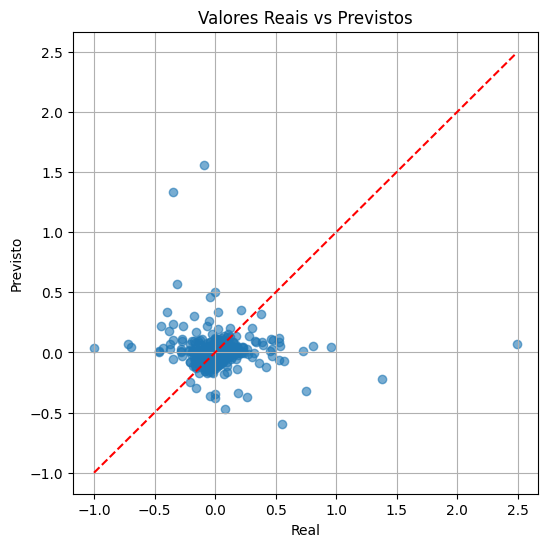

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(resultado['Real'], resultado['Previsto'], alpha=0.6)
plt.plot([resultado['Real'].min(), resultado['Real'].max()],
         [resultado['Real'].min(), resultado['Real'].max()],
         color='red', linestyle='--')
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Valores Reais vs Previstos')
plt.grid(True)
plt.show()

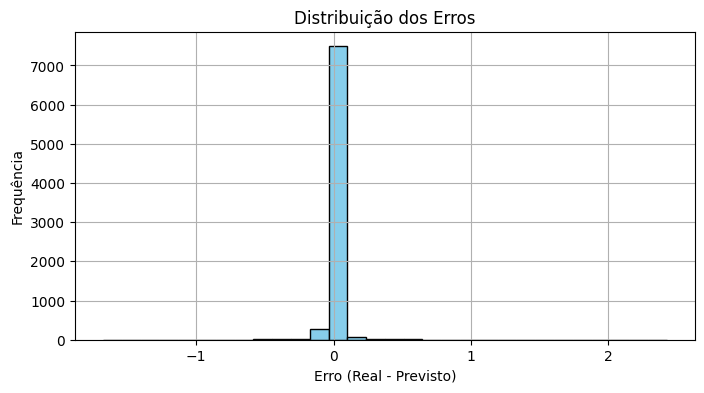

In [9]:
resultado['Erro'] = resultado['Real'] - resultado['Previsto']

plt.figure(figsize=(8, 4))
plt.hist(resultado['Erro'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribuição dos Erros')
plt.xlabel('Erro (Real - Previsto)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

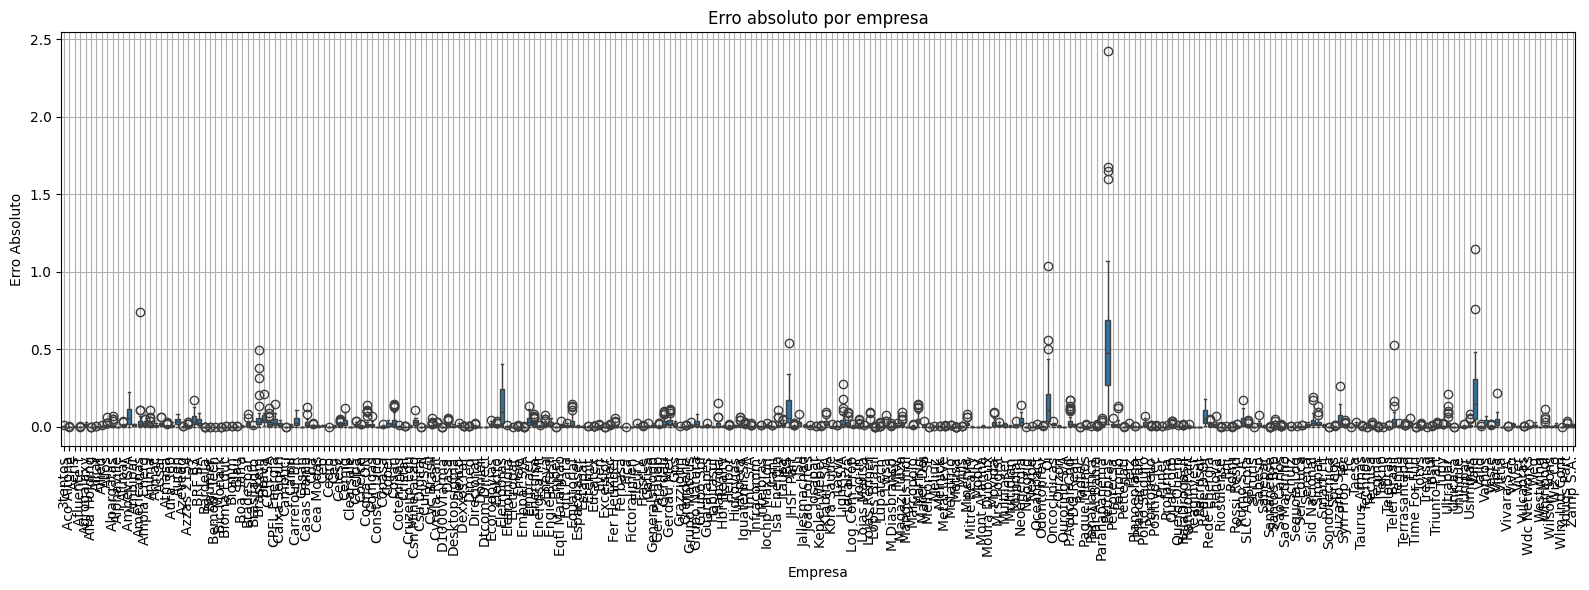

In [10]:
plt.figure(figsize=(16,6))
sns.boxplot(data=resultado, x='Empresa', y='Erro Absoluto')
plt.xticks(rotation=90)
plt.title('Erro absoluto por empresa')
plt.grid(True)
plt.tight_layout()
plt.show()

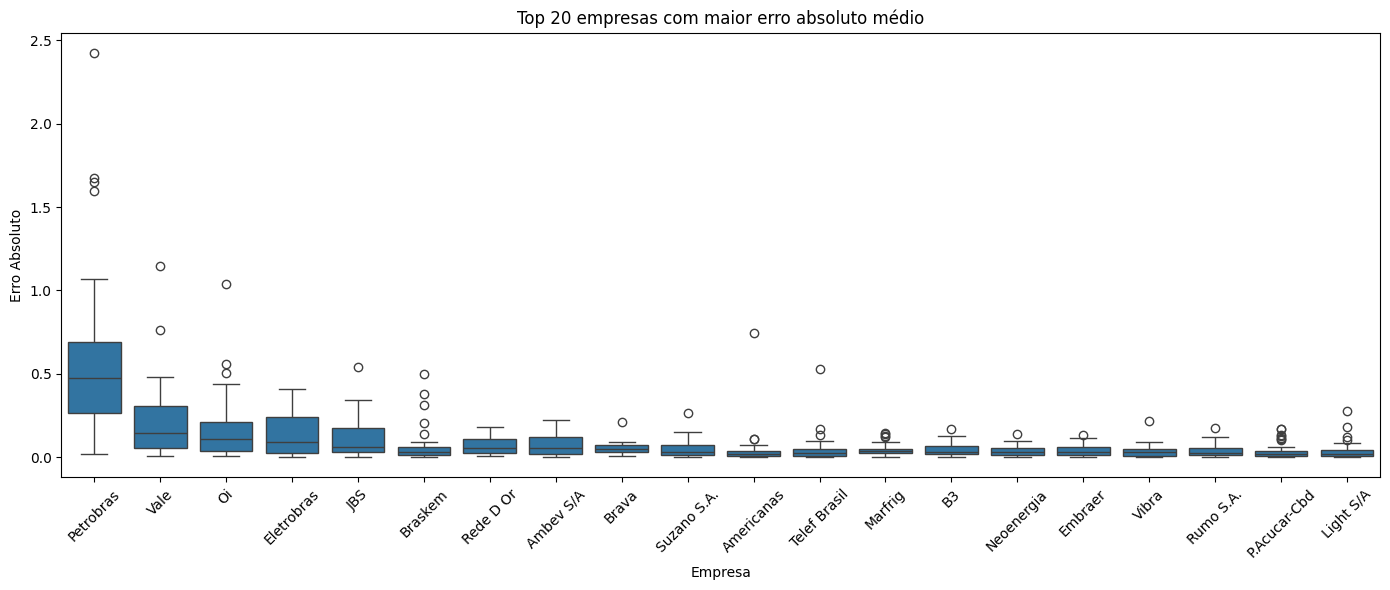

In [11]:
top_n = 20
top_empresas = resultado.groupby('Empresa')['Erro Absoluto'].mean().nlargest(top_n).index

plt.figure(figsize=(14, 6))
sns.boxplot(data=resultado[resultado['Empresa'].isin(top_empresas)],
            x='Empresa', y='Erro Absoluto', order=top_empresas)
plt.xticks(rotation=45)
plt.title(f'Top {top_n} empresas com maior erro absoluto médio')
plt.tight_layout()
plt.show()

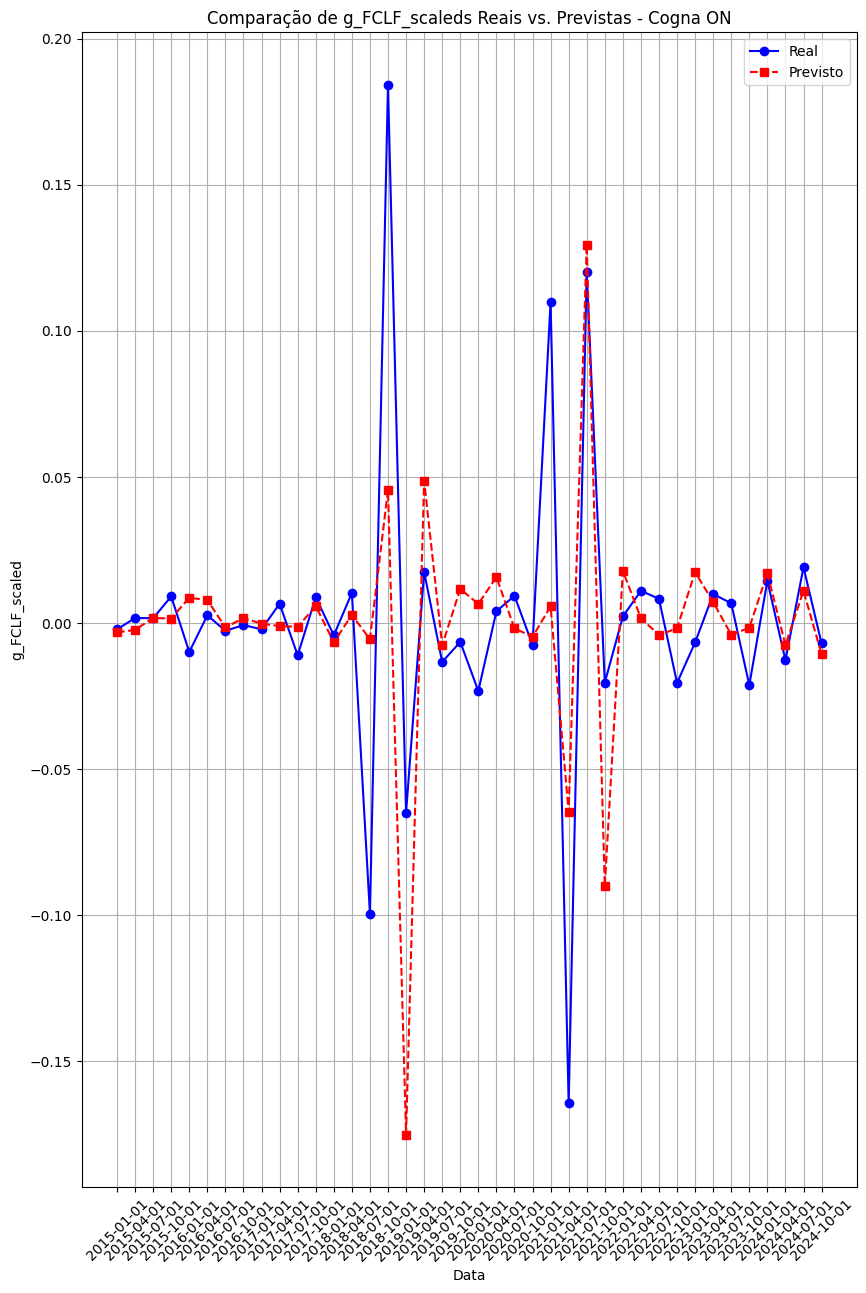

In [14]:
results_df = resultado
empresa_selecionada = 'Cogna ON'
df_selecionado = results_df[results_df["Empresa"] == empresa_selecionada]

plt.figure(figsize=(10,15))
plt.plot(df_selecionado["Data"], df_selecionado["Real"], label="Real", marker='o', linestyle='solid', color="blue")
plt.plot(df_selecionado["Data"], df_selecionado["Previsto"], label="Previsto", marker='s', linestyle='dashed', color="red")

plt.xlabel("Data")
plt.ylabel("g_FCLF_scaled")
plt.title(f"Comparação de g_FCLF_scaleds Reais vs. Previstas - {empresa_selecionada}")
plt.legend()
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo X para melhor visualização
plt.grid(True)

plt.show()